# Goal:- Finding number of clusters in IRIS Dataset

# Importing Library...

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize']=18,10
from sklearn import datasets

import warnings
warnings.filterwarnings('ignore')

C:\Users\user\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [54]:
#loading dataset
iris_data=pd.read_csv('Iris.csv')

In [55]:
iris_data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


# Exploratory Data Analysis(EDA)

In [56]:
iris_data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [57]:
iris_data.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [58]:
iris_data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

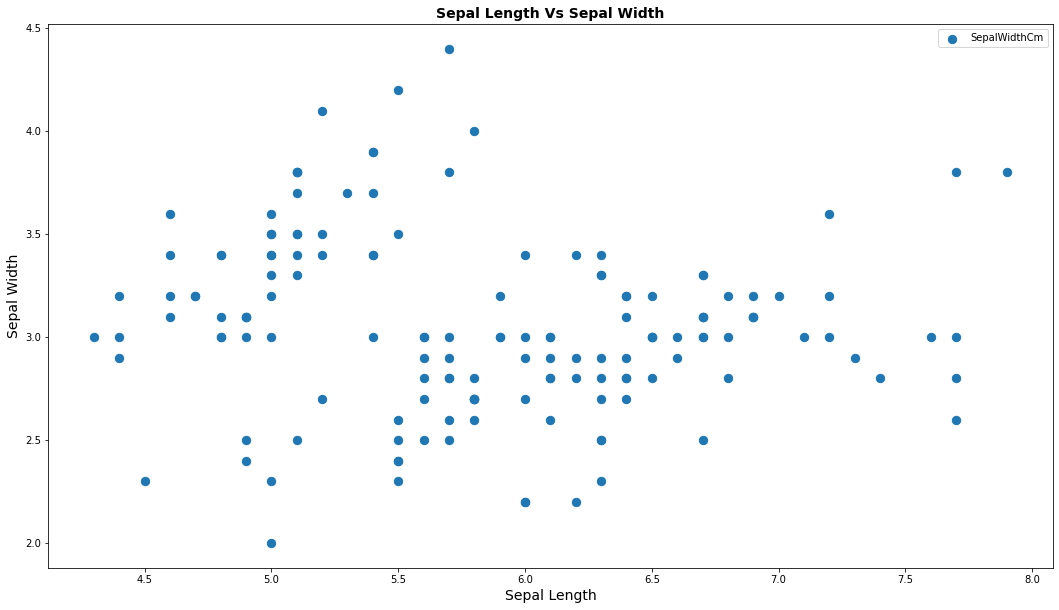

In [59]:
#Ploting Sepal Length and Sepal Width Graph
plt.scatter(x='SepalLengthCm',y='SepalWidthCm',data=iris_data,s=70)
plt.xlabel('Sepal Length', fontsize=14)
plt.ylabel('Sepal Width', fontsize=14)
plt.title('Sepal Length Vs Sepal Width',fontsize=14,fontweight='bold')
plt.legend()

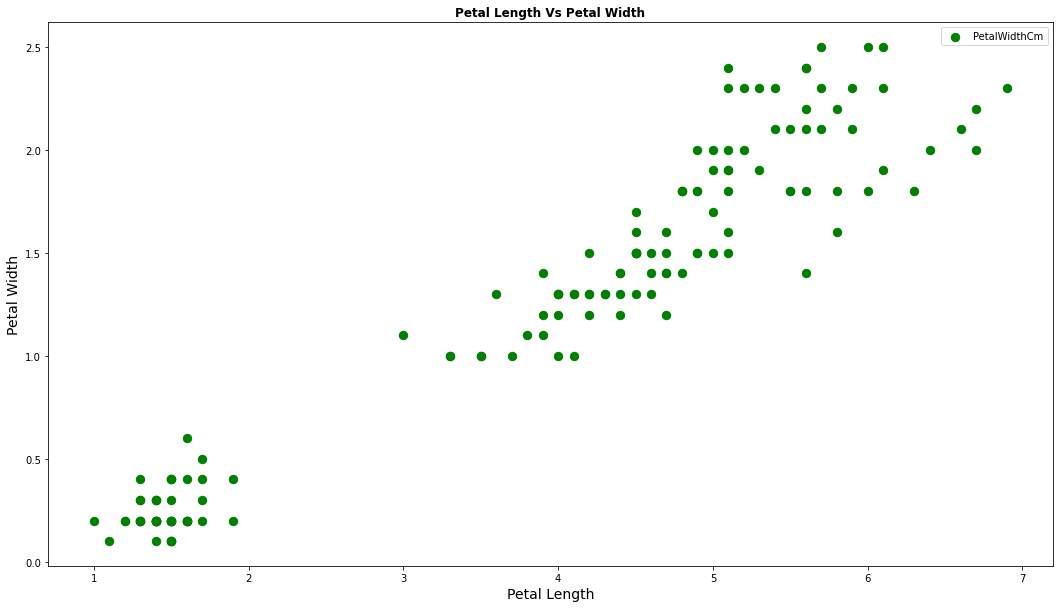

In [61]:
#Ploting Petal Length and Petal Width Graph
plt.scatter(x='PetalLengthCm',y='PetalWidthCm',data=iris_data,s=70,color='green')
plt.xlabel('Petal Length',fontsize=14)
plt.ylabel('Petal Width',fontsize=14)
plt.title('Petal Length Vs Petal Width',fontweight='bold')
plt.legend()

In [62]:
iris_features=iris_data.iloc[:,[1,2,3,4]].values

In [63]:
x=iris_features

In [64]:
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

# Importing KMeans from sklearn.cluster

In [12]:
from sklearn.cluster import KMeans

In [65]:
wcss=[]
for i in range(2,10):
    kmn=KMeans(n_clusters=i,init = 'k-means++',max_iter = 300, n_init = 10, random_state = 0)
    kmn.fit(x)
    wcss.append(kmn.inertia_)

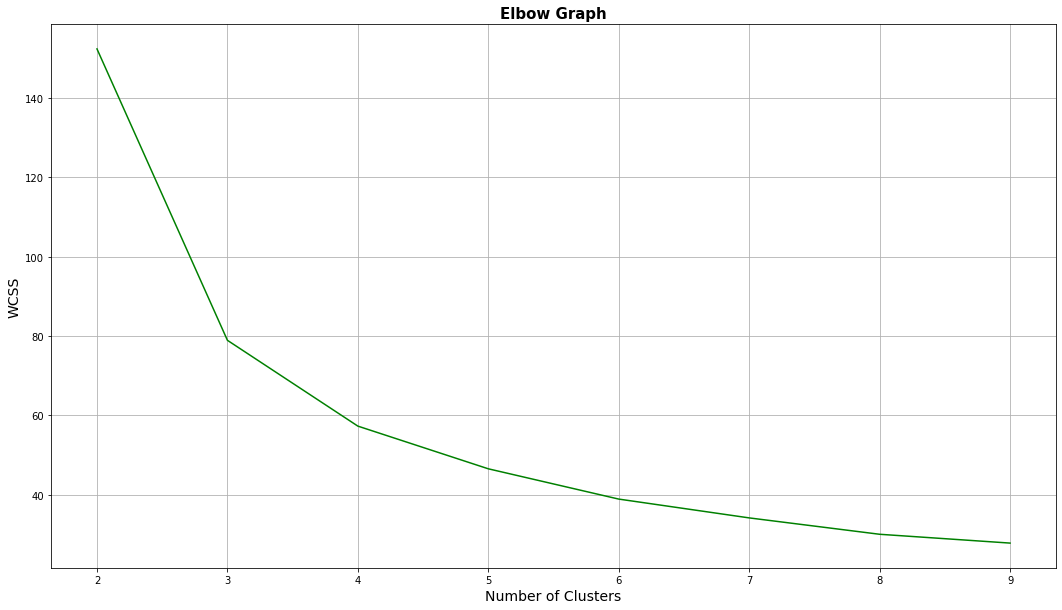

In [67]:
#Ploting Elbow Graph for Knowing Number of Clusters
plt.plot(range(2,10),wcss,color='green')
plt.title('Elbow Graph',fontweight='bold',fontsize=15)
plt.xlabel('Number of Clusters',fontsize=14)
plt.ylabel('WCSS',fontsize=14)
plt.grid()
plt.show()

# As per Graph We are Taking The Number of clusters=3

In [30]:
kmn=KMeans(n_clusters=3)
y_predict=kmn.fit_predict(x)

In [31]:
y_predict

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [32]:
iris_data.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

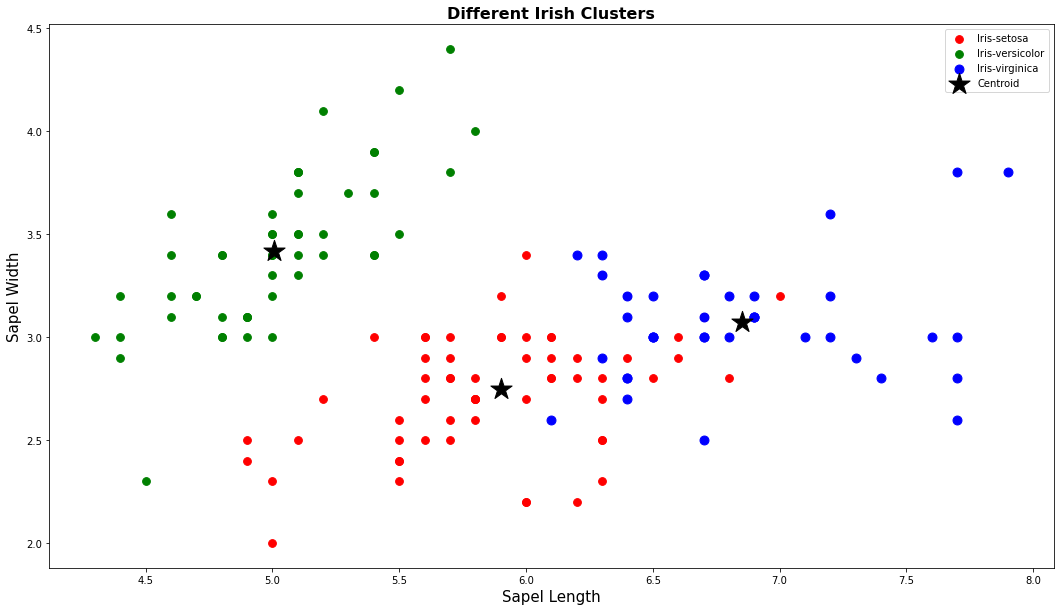

In [48]:
plt.scatter(x[y_predict==0,0],x[y_predict==0,1],color='red',s=60,label='Iris-setosa')
plt.scatter(x[y_predict==1,0],x[y_predict==1,1],color='green',s=60,label='Iris-versicolor')
plt.scatter(x[y_predict==2,0],x[y_predict==2,1],color='blue',s=80,label='Iris-virginica')
plt.scatter(kmn.cluster_centers_[:,0],kmn.cluster_centers_[:,1],s=500,color='black',marker='*',label='Centroid')
plt.title('Different Irish Clusters',fontweight='bold',fontsize=16)
plt.xlabel('Sapel Length',fontsize=15)
plt.ylabel('Sapel Width',fontsize=15)
plt.legend()

In [51]:
iris_data[iris_data["Species"] == "Iris-setosa"].describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,50.00000,50.00000,50.000000,50.000000,50.00000
mean,25.50000,5.00600,3.418000,1.464000,0.24400
std,14.57738,0.35249,0.381024,0.173511,0.10721
min,1.00000,4.30000,2.300000,1.000000,0.10000
25%,13.25000,4.80000,3.125000,1.400000,0.20000
50%,25.50000,5.00000,3.400000,1.500000,0.20000
75%,37.75000,5.20000,3.675000,1.575000,0.30000
max,50.00000,5.80000,4.400000,1.900000,0.60000


Iris-setosa Sepal Length Varies from 4.3 cm to 5.8 cm

In [50]:
iris_data[iris_data["Species"] == "Iris-versicolor"].describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,50.00000,50.000000,50.000000,50.000000,50.000000
mean,75.50000,5.936000,2.770000,4.260000,1.326000
std,14.57738,0.516171,0.313798,0.469911,0.197753
min,51.00000,4.900000,2.000000,3.000000,1.000000
25%,63.25000,5.600000,2.525000,4.000000,1.200000
50%,75.50000,5.900000,2.800000,4.350000,1.300000
75%,87.75000,6.300000,3.000000,4.600000,1.500000
max,100.00000,7.000000,3.400000,5.100000,1.800000


Iris-versicolor Sepal Length Varies from 4.9 cm to 7 cm

In [53]:
iris_data[iris_data["Species"] == "Iris-virginica"].describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,50.00000,50.00000,50.000000,50.000000,50.00000
mean,125.50000,6.58800,2.974000,5.552000,2.02600
std,14.57738,0.63588,0.322497,0.551895,0.27465
min,101.00000,4.90000,2.200000,4.500000,1.40000
25%,113.25000,6.22500,2.800000,5.100000,1.80000
50%,125.50000,6.50000,3.000000,5.550000,2.00000
75%,137.75000,6.90000,3.175000,5.875000,2.30000
max,150.00000,7.90000,3.800000,6.900000,2.50000


Iris-setosa Sepal Length Varies from 4.9 cm to 7.9 cm